In [ ]:
%load_ext jupyter_ai_magics

In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Table of Content
## 1. Visualization
## 2. Simulation
## 3. A/B Testing

In [ ]:
university_rankings = Table().read_table("data/world_university_rankings.csv")
university_rankings 

# 1. Visualization

To examine the relationship among parameters of interest, 
it is often more intuitive to visualize them via plots rather than looking at the table one row at a time.

The important question we need to ask ourselves is: What is the best way to visualize the data?

Example:

Visualize the relationship between the Overall scores and the Research Quality Scores of the top 50 universities.

What types of visualization should we use?

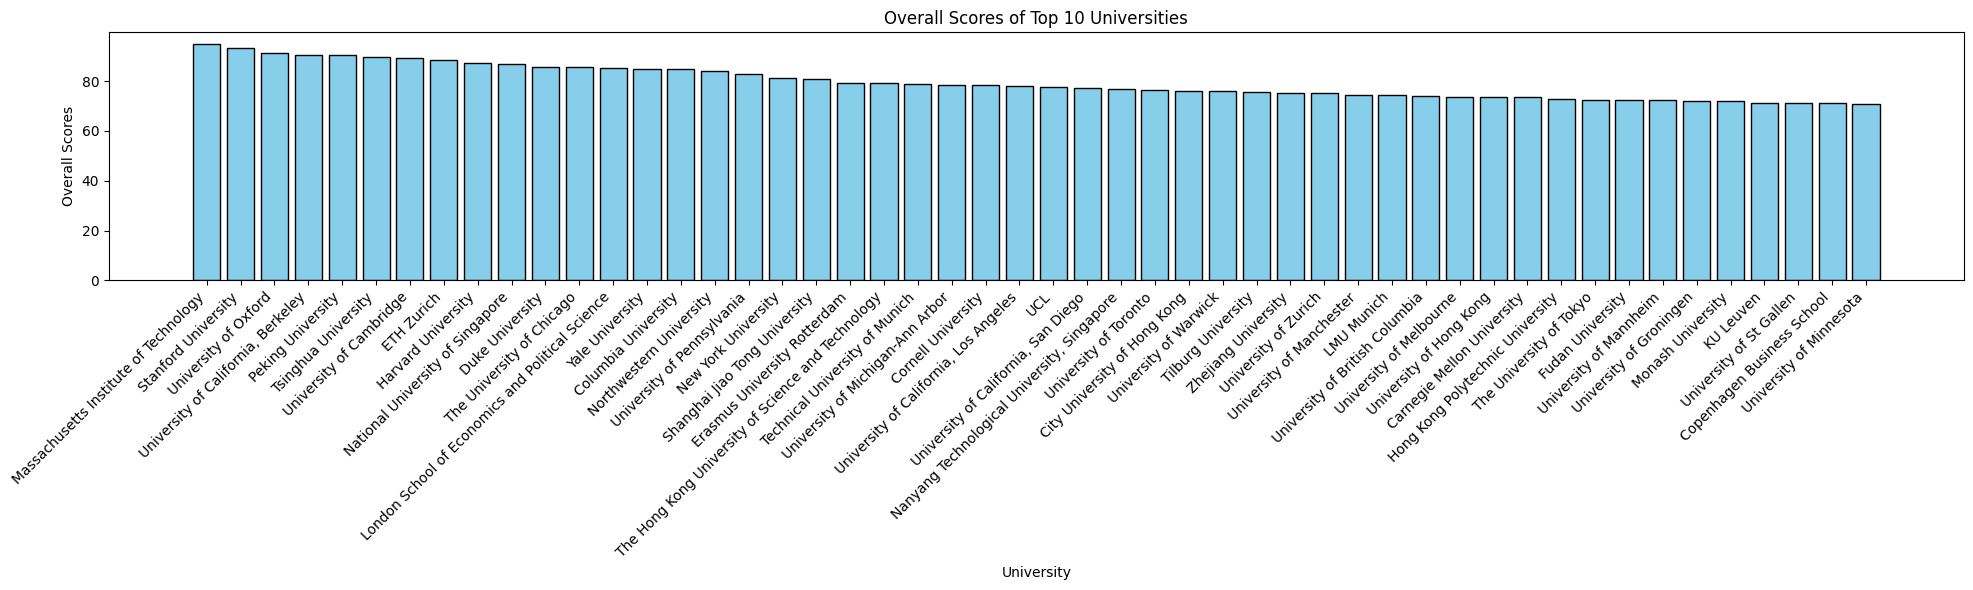

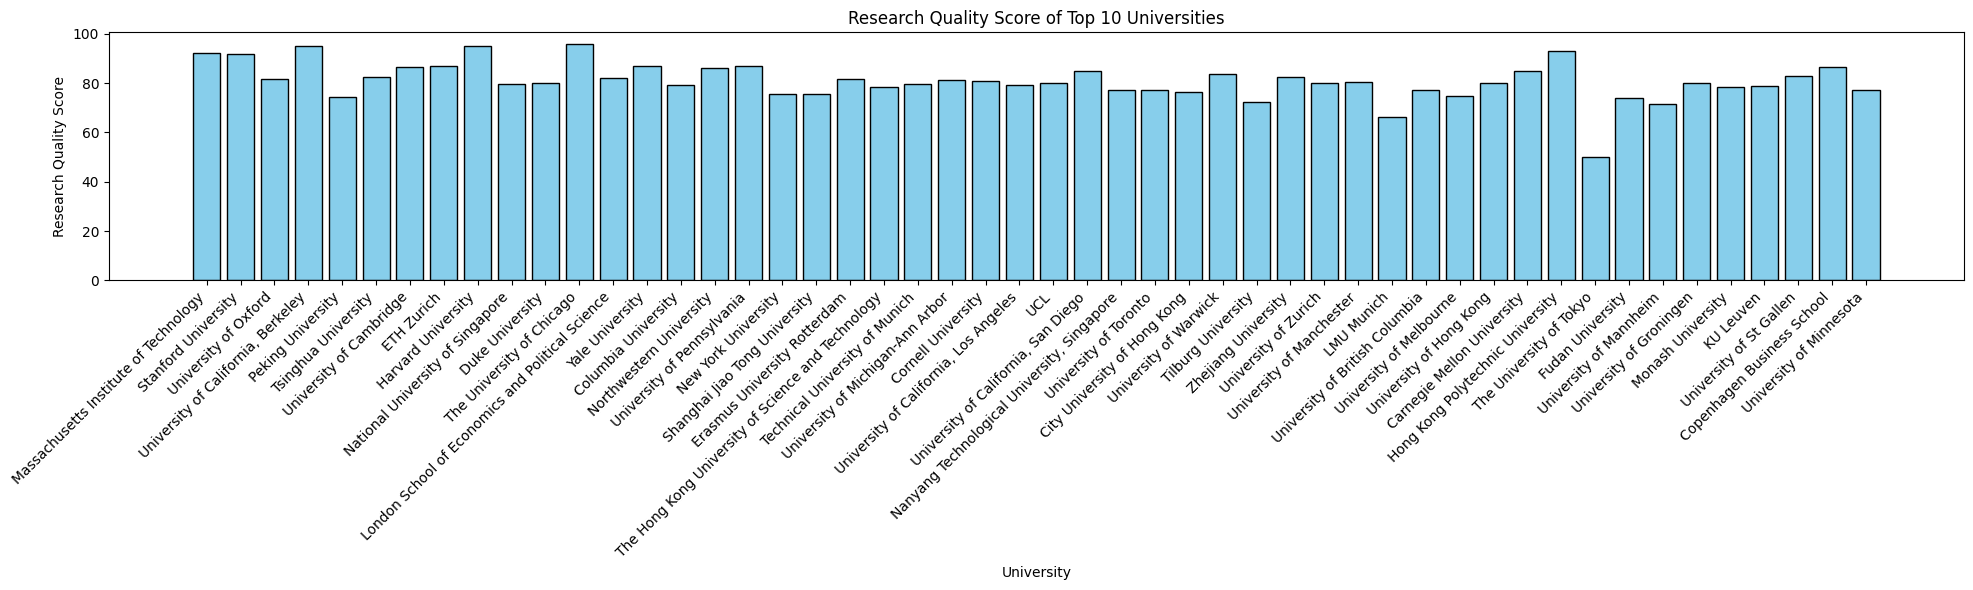

In [30]:
# bar plot
plt.figure(figsize=(20, 6))
plt.bar(university_rankings.column('ranking-institution-title')[:50], university_rankings.column('Overall scores')[:50], color='skyblue')
plt.xlabel('University')
plt.ylabel('Overall Scores')
plt.title('Overall Scores of Top 50 Universities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 6))
plt.bar(university_rankings.column('ranking-institution-title')[:50], university_rankings.column('Research Quality Score')[:50], color='skyblue')
plt.xlabel('University')
plt.ylabel('Research Quality Score')
plt.title('Research Quality Score of Top 50 Universities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

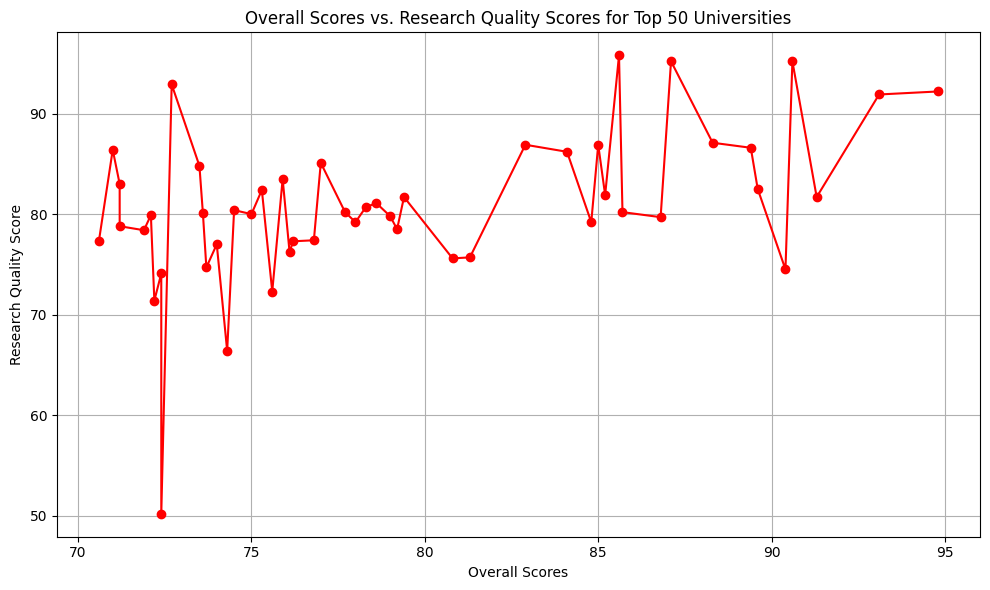

In [33]:
# line plot
plt.figure(figsize=(10, 6))
plt.plot(university_rankings.column('Overall scores')[:50], university_rankings.column('Research Quality Score')[:50], marker='o', linestyle='-', color='red')
plt.xlabel('Overall Scores')
plt.ylabel('Research Quality Score')
plt.title('Overall Scores vs. Research Quality Scores for Top 50 Universities')
plt.grid(True)
plt.tight_layout()
plt.show()

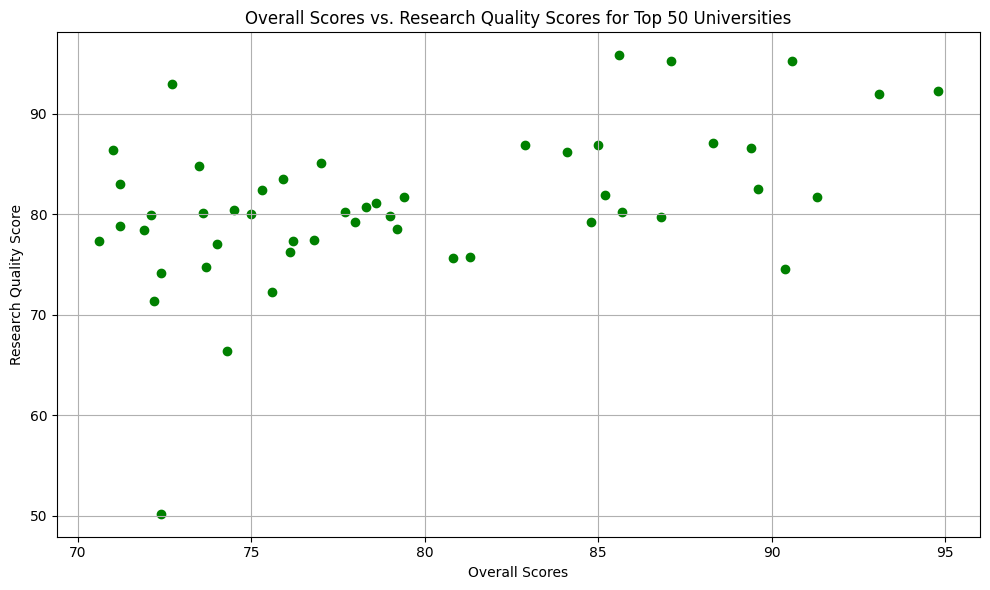

In [32]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(university_rankings.column('Overall scores')[:50], university_rankings.column('Research Quality Score')[:50], color='green')
plt.xlabel('Overall Scores')
plt.ylabel('Research Quality Score')
plt.title('Overall Scores vs. Research Quality Scores for Top 50 Universities')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Simulation

Simulation is creating data by pseudo‐random **sampling** from known probability distributions.

When designing a simulation experiment, we need to decide the parameters of interest, how to sample it, and how many times to sample.

Example

Say we want to understand the distribution of Teaching Scores for universities in different countries. Do the following:
1. Randomly sample 30 universities **with replacement** from the dataset.
2. Calculate the mean and standard deviation of the Teaching Scores for this sample.
3. Repeat this process 1000 times to generate a distribution of sample means.
4. Plot the histogram of the sample means and overlay it with a normal distribution curve.
5. Calculate the 95% confidence interval for the mean Teaching Score from your simulated sample distribution.

In [37]:
def sample_mean_teaching_scores(table, sample_size=30):
    sample = np.random.choice(table.column('Teaching Score'), size=sample_size, replace=True)
    return sample.mean()

sample_means = [sample_mean_teaching_scores(university_rankings) for _ in range(1000)]

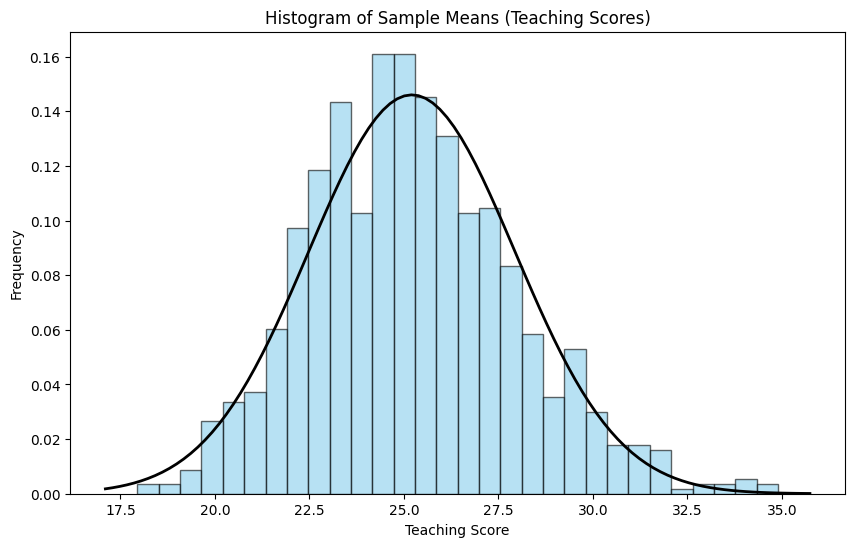

array([ 20.25583333,  31.08825   ])

In [40]:
from scipy.stats import norm

plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')

# Fit a normal distribution to the data
mu, std = norm.fit(sample_means)

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Sample Means (Teaching Scores)')
plt.xlabel('Teaching Score')
plt.ylabel('Frequency')
plt.show()

confidence_interval = np.percentile(sample_means, [2.5, 97.5])
confidence_interval

# 3. A/B Testing

Testing Hypothesis: 

- **null hypothesis (H0)**: there is no significance in the event of interest with respect to the population
- **alternative hypothesis (H1)**: there is significance ...

Null hypothesis and alternative hypothesis always come in pairs.

To assess significance, perform **a suitable statical analysis** and calculate the probability of getting the corresponding statical values (**p value**) to see if it is below a certain significance level (**alpha**, the convention value is 5%). If that is the case, it means that the chance that this event happens by chance is below **alpha**, which means that it is very unlikely that this even happens by chance, thus suggests significance.


Example:

- null hypothesis: There is no significant difference in the average overall scores between universities in the United States and universities in other countries.
- alternative hypothesis: There is a significant difference ...

What are the values we want to calculate? What stastical analysis should we perform? 

In [16]:
us_uni = university_rankings.where("location", "United States")
us_uni_mean = np.mean(us_uni.column("Overall scores"))
us_uni_std = np.std(us_uni.column("Overall scores"))
us_uni_num = us_uni.num_rows
us_uni_mean, us_uni_std, us_uni_num

(51.161538461538463, 15.768481988021632, 143)

In [17]:
non_us_uni = university_rankings.where("location", are.not_equal_to("United States"))
non_us_uni_mean = np.mean(non_us_uni.column("Overall scores"))
non_us_uni_std = np.std(non_us_uni.column("Overall scores"))
non_us_uni_num = non_us_uni.num_rows
non_us_uni_mean, non_us_uni_std, non_us_uni_num

(43.175880052151243, 14.339292566862449, 767)

In [19]:
# Calculate the pooled standard deviation
pooled_std = np.sqrt(((us_uni_num - 1) * us_uni_std**2 + (non_us_uni_num - 1) * non_us_uni_std**2) / (us_uni_num + non_us_uni_num - 2))

# Calculate the standard error of the difference between the two means
se = pooled_std * np.sqrt(1/us_uni_num + 1/non_us_uni_num)

# Calculate the t-value
t_value = (us_uni_mean - non_us_uni_mean) / se
t_value

6.0163777263418021

In [20]:
from scipy.stats import t

# Calculate the degrees of freedom (df)
numerator = (us_uni_std**2 / us_uni_num + non_us_uni_std**2 / non_us_uni_num)**2
denominator = ((us_uni_std**2 / us_uni_num)**2 / (us_uni_num - 1)) + ((non_us_uni_std**2 / non_us_uni_num)**2 / (non_us_uni_num - 1))
df = numerator / denominator

# calculate p value
p_value = 2 * (1 - t.cdf(abs(t_value), df))

df, p_value

(188.33142929468494, 9.1130578638853876e-09)